# **5.1 Datenvorbereitung - Beispiel 3**
------------------------------------------------

## a) Notwendige Bibliotheken laden

**LIBRARIES:**

* pandas für Verarbeitung von Tabellen-Daten
* numpy für die Berechnung von Zusammenhängen (z.B. Korrelationen)
* missingno für die Visualisierung von fehlenden Datenpunkten
* matplotlib, seaborn, plotly für die Visualisierung

* Facebook Prophet - Zeitreihenvorhersagetool


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno
import plotly.express as px
from prophet import Prophet
import warnings
warnings.simplefilter("ignore")

## b) Daten einlesen und Überblick über die ersten Zeilen verschaffen

In [2]:
df = pd.read_csv('google_apps.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# *Datensatz google_apps.csv - Metadaten*
---------------------------------------------------

Dieser (Teil-) Datensatz enthält Informationen zu diversen Apps verfügbar für Android im Google Play Store. Der Datensatz gibt einen Überblick über Art der App, Genre, Größe, Anzahl der Installationen, Kunden-feedback, usw. und bietet die Möglichkeit, einen Einblick in den Markt der App-Entwicklung zu erhalten.

Quelle: google play store

# **Attribute:**

* App
* Category
* Rating
* Reviews
* Size
* Installs
* Type
* Price
* Content Rating
* Genres
* Last Updated
* Current Version
* Android Version

In [3]:
df.shape

(1930, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1930 non-null   object 
 1   Category        1930 non-null   object 
 2   Rating          1848 non-null   float64
 3   Reviews         1930 non-null   int64  
 4   Size            1930 non-null   object 
 5   Installs        1930 non-null   object 
 6   Type            1930 non-null   object 
 7   Price           1930 non-null   object 
 8   Content Rating  1930 non-null   object 
 9   Genres          1930 non-null   object 
 10  Last Updated    1930 non-null   object 
 11  Current Ver     1928 non-null   object 
 12  Android Ver     1930 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 196.1+ KB


In [5]:
# Welche Categories haben die Apps?
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME'], dtype=object)

## c) Fehlende Werte

*   Abfrage mit function isnull
*   **Visualisierung** mit missingno



In [6]:
for col in df.columns:
    pct_missing = df[col].isnull().sum()
    print(f'{col} - {pct_missing :}')

App - 0
Category - 0
Rating - 82
Reviews - 0
Size - 0
Installs - 0
Type - 0
Price - 0
Content Rating - 0
Genres - 0
Last Updated - 0
Current Ver - 2
Android Ver - 0


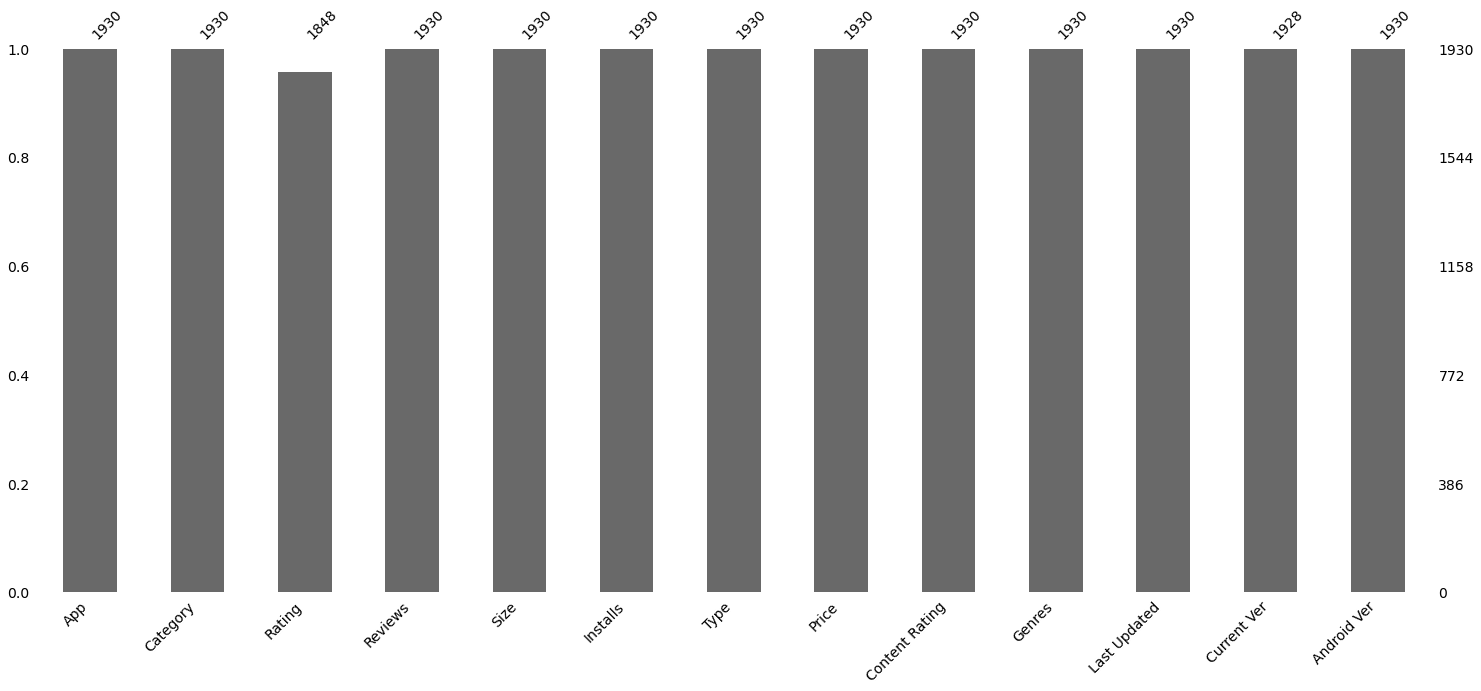

In [7]:
missingno.bar(df, fontsize = 14)
plt.show()

## d) Duplikate

redundante Datenpunkte finden und entfernen

In [8]:
df.duplicated().sum()

221

## e) Bereinigen des Datensatzes

* Einträge mit fehlenden Daten entfernen - Achtung! Bei großen Verlusten gezieltes Anpassen der Filter! --> dropna
* Redundante Datensätze löschen --> drop_duplicates

In [9]:
# Entfernen der Zeilen mit fehlenden Daten
df2 = df.dropna()
df2.shape

(1846, 13)

In [10]:
# Duplikate entfernen
df3 = df2.drop_duplicates()
df3.shape

(1627, 13)

## f) Konsolidieren

* Zusammenfassen von Attributen
* Typos entfernen
* Formate vereinheitlichen - z.B. Datum...

--> hier im Datensatz gibt es Probleme mit Zahlen, die als strings (type object) abgelegt sind: 19M, 1000+, $1.99

--> weitere Anpassung notwendig an das Zeitformat (June 20, 2018) mit pandas to_datetime

In [11]:
df3['Size'] = df3.Size.replace("Varies with device",np.nan)
df3['Size'] = df3.Size.str.replace("M","000") # All size values became the kilobyte type.
df3['Size'] = df3.Size.str.replace("k","")
df3['Size'] = df3.Size.replace("1,000+",1000)
df3['Size'] =df3['Size'].astype(float)
df3['Size'].dtype

dtype('float64')

In [12]:
df3['Installs'] = df3.Installs.str.replace(",","")
df3['Installs'] = df3.Installs.str.replace("+","")
df3['Installs'] = df3.Installs.replace("Free",np.nan)
df3['Installs'] = df3['Installs'].astype(float)
df3['Installs'].dtype

dtype('float64')

In [13]:
df3['Price'] = df3.Price.replace("Everyone",np.nan)
df3['Price'] = df3.Price.str.replace("$","").astype(float)
df3['Price'].dtype

dtype('float64')

In [14]:
# super wichtiges Tool zur Umwandlung in beliebige Datums/ Zeitformate
df3['Last Updated'] = pd.to_datetime(df3['Last Updated'])

# Zeit als Index übernehmen
df3.set_index('Last Updated', inplace=True)

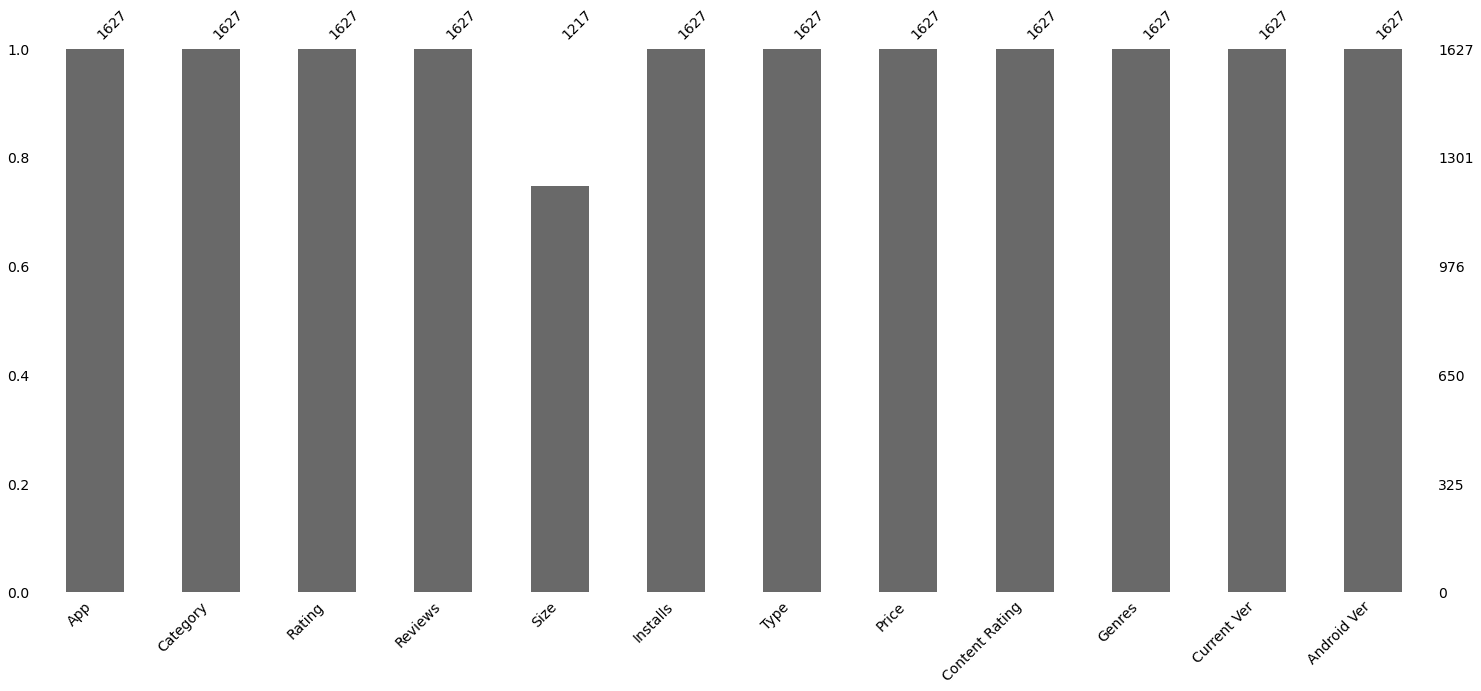

In [15]:
missingno.bar(df3, fontsize = 14)
plt.show()

## g) Erste Übersicht visualisieren

hilfreich zur Bewertung der Datenqualität

In [16]:
df3.describe()

,Rating,Reviews,Size,Installs,Price
count,1627.000000,1.627000e+03,1217.000000,1.627000e+03,1627.000000
mean,4.290781,9.632306e+05,25517.430238,2.861382e+07,0.079428
std,0.368085,4.100835e+06,26229.727799,1.176473e+08,0.649249
min,1.000000,1.000000e+00,1.100000,1.000000e+01,0.000000
25%,4.100000,3.431000e+03,8.600000,1.000000e+05,0.000000
50%,4.400000,2.800800e+04,19000.000000,1.000000e+06,0.000000
75%,4.500000,1.948870e+05,38000.000000,1.000000e+07,0.000000
max,5.000000,6.911932e+07,100000.000000,1.000000e+09,9.990000


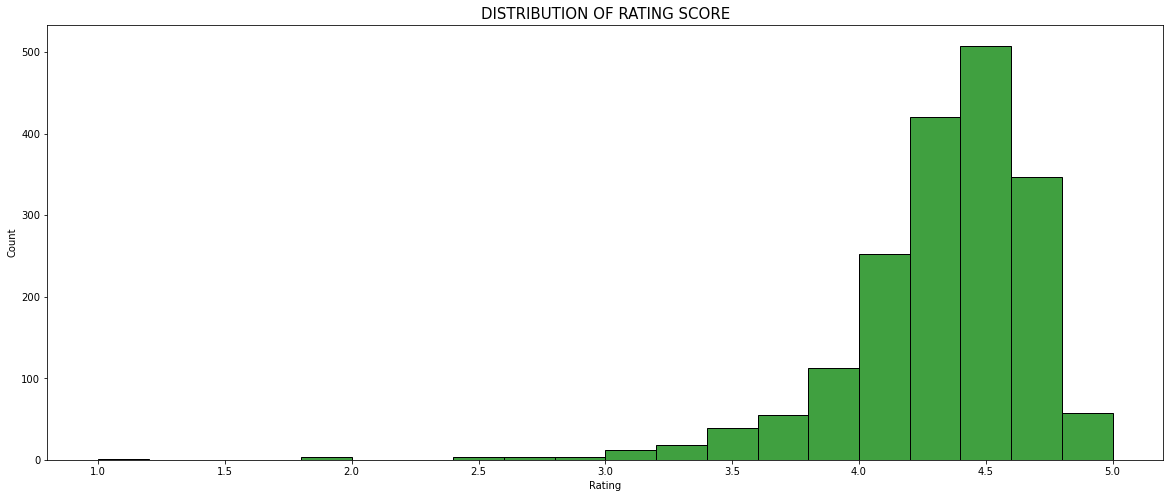

In [17]:
plt.figure(figsize=(20,8))
sns.histplot(df["Rating"], color='green', binwidth=0.2)
plt.title("DISTRIBUTION OF RATING SCORE",fontsize=15)

plt.show()

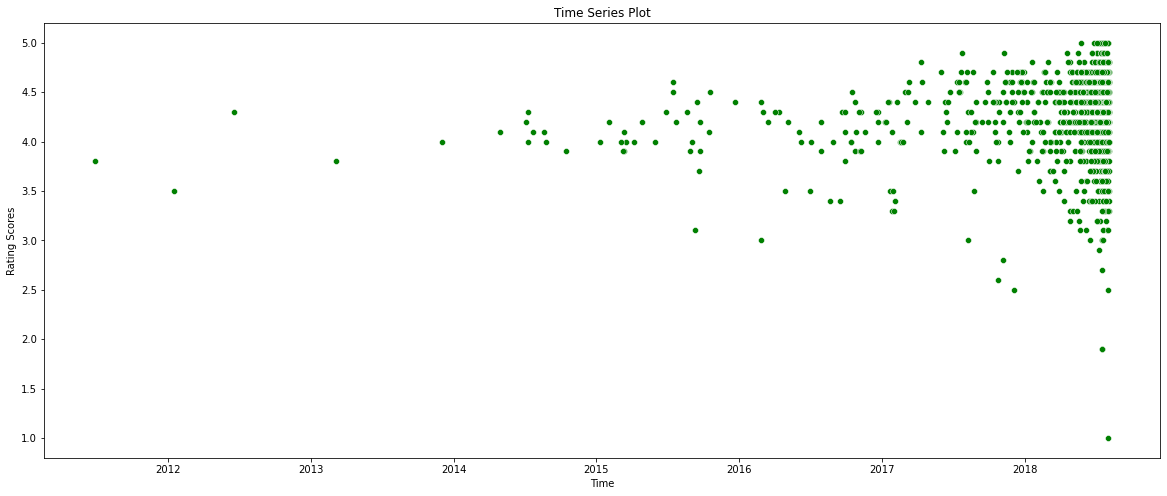

In [18]:
plt.figure(figsize=(20,8))
sns.scatterplot(df3["Rating"], color='green')
plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Rating Scores')

plt.show()

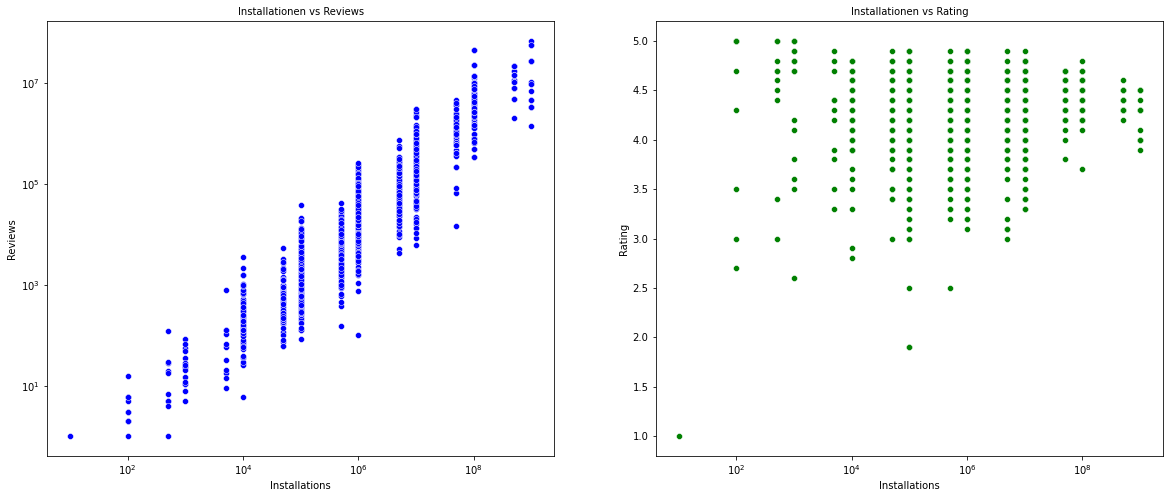

In [19]:
plt.figure(figsize=(20,8))

ax1=plt.subplot(1,2,1)
sns.scatterplot(data=df3, x=df3['Installs'], y=df3['Reviews'], marker='o', color='blue')
ax1.set_xscale('log')
ax1.set_yscale('log')
plt.title('Installationen vs Reviews', fontsize=10)
plt.ylabel('Reviews')
plt.xlabel('Installations')

ax2=plt.subplot(1,2,2)
#sns.stripplot(x=df3['Installs'], y=df3['Rating'], data=df3, marker='o', color='green', jitter=0.01)
sns.scatterplot(data=df3, x=df3['Installs'], y=df3['Rating'], marker='o', color='green')
ax2.set_xscale('log')
plt.title('Installationen vs Rating', fontsize=10)
plt.ylabel('Rating')
plt.xlabel('Installations')

plt.show()

In [20]:
category_counts = df3['Category'].value_counts()
grouped = df3.groupby('Category')
durchschnitt = grouped['Installs'].mean()/10e5
durchschnitt

Category
ART_AND_DESIGN           2.423191
AUTO_AND_VEHICLES        0.873878
BEAUTY                   0.622857
BOOKS_AND_REFERENCE     29.673333
BUSINESS                 8.104079
COMICS                   0.983541
COMMUNICATION          145.454409
DATING                   1.116056
EDUCATION                4.138388
ENTERTAINMENT           22.123063
EVENTS                   0.482567
FINANCE                  5.074754
FOOD_AND_DRINK           3.004933
GAME                    78.717110
HEALTH_AND_FITNESS       4.997484
HOUSE_AND_HOME           1.994107
LIBRARIES_AND_DEMO       1.109486
LIFESTYLE                3.276205
Name: Installs, dtype: float64

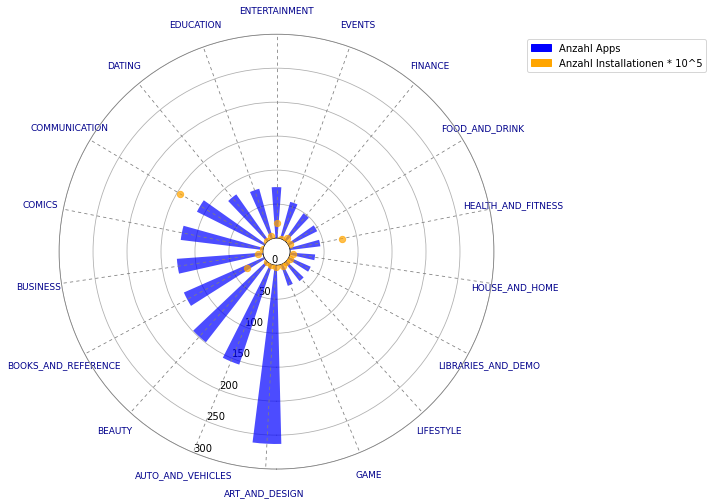

In [21]:
from matplotlib.lines import Line2D

# Values for the x axis
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(df3['Category'].unique()), endpoint=False)

# setup figure with polar projection -----------------------------------------
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# plot data -----------------------------------------
ax.bar(ANGLES, df3['Category'].value_counts(), color = 'blue', alpha=0.7, linewidth=0, width=0.15, zorder=3)

# format axis -----------------------------------------
# set max value and offset from center
max_value = 300
r_offset = -20
ax.set_rlim(0, max_value)
ax.set_rorigin(r_offset)
ax.set_xticks(ANGLES)
ax.set_xticklabels(df3['Category'].unique(), size=9, color='darkblue');

# start on the top and plot bars clockwise
ax.set_theta_zero_location('S')
ax.set_theta_direction(-1)

# Add dashed vertical lines. These are just references
ax.xaxis.grid(False)
ax.vlines(ANGLES, 0, 300, color='grey', ls=(0, (4, 4)), linewidths=0.8, zorder=5)

# Add dots to represent the mean gain
ax.scatter(ANGLES,durchschnitt, s=40, color='orange', alpha=0.7, zorder=5)

# Remove spines
#ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("grey")

# Add additional space for label text
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(13)


# Add legend
colors = {'Anzahl Apps':'blue', 'Anzahl Installationen * 10^5':'orange'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc='best',bbox_to_anchor=(0.5, 0., 1, 1))


fig.savefig("plot.png", dpi=300)
plt.show()